In [6]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import scipy.stats as ss

In [7]:
mpl.rcParams['figure.dpi'] *= 2

In [8]:
rng = np.random.default_rng()

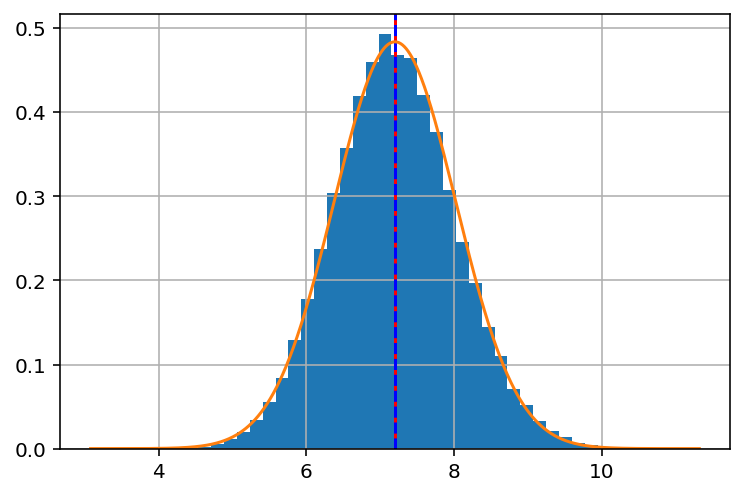

In [9]:

# means
R0 = 160/100 # TES resistance (mOhm)
b0 = 2.5 # beta

# std devs
dR = R0/10
db = b0/10

# typical ranges
Rm_space = dR*np.linspace(-5, 5, 1000) + R0
bm_space = db*np.linspace(-5, 5, 1000) + b0

def R(N = 100):
    return rng.normal(loc = R0, scale = dR, size = N)

def b(N = 100):
    return rng.normal(loc = b0, scale = db, size = N)

def normal(x, mu, sig):
    return np.exp(-(x-mu)**2/2/sig**2)/np.sqrt(2*np.pi)/sig

def Rnormal(x):
    return normal(x, R0, dR)
def bnormal(x):
    return normal(x, b0, db)


N = 100_000
Rbs = R(N)*(2+b(N))

# combined params
Rb0 = R0*(2 + b0)
dRb = np.sqrt(dR**2*db**2 + dR**2*(2+b0)**2 + db**2*R0**2)

xs = dRb*np.linspace(-5, 5, 1000) + Rb0

Rb_dist= normal(xs, Rb0, dRb)

plt.figure()
plt.grid()
plt.hist(Rbs, density = True, bins = 40)
plt.axvline(Rb0, color = 'r')
plt.axvline(Rbs.mean(), color = 'b', linestyle = '--')
plt.plot(xs, Rb_dist)

In [10]:

def show_approx(R0 = 2.5, b0 = 0.5, rel_dR = 0.1, rel_db = 0.1):
    # means
    #R0 = TES resistance (mOhm)
    #b0 = beta


    dR = R0*rel_dR
    db = b0*rel_db

    # typical ranges
    #Rm_space = dR*np.linspace(-5, 5, 1000) + R0
    #bm_space = db*np.linspace(-5, 5, 1000) + b0

    def R(N = 100):
        return rng.normal(loc = R0, scale = dR, size = N)

    def b(N = 100):
        return rng.normal(loc = b0, scale = db, size = N)

    N = 1000_000
    Rbs = R(N)*(2+b(N))

    # combined params
    Rb0 = R0*(2 + b0)
    dRb = np.sqrt(dR**2*db**2 + dR**2*(2+b0)**2 + db**2*R0**2)

    xs = dRb*np.linspace(-5, 5, 1000) + Rb0

    Rb_dist= normal(xs, Rb0, dRb)

    plt.figure()
    plt.title(f'$\\beta = {b0}$, $\\Delta\\beta/\\beta = ${rel_db*100:.0f}%')
    plt.grid()
    plt.hist(Rbs, density = True, bins = 100, label = f'simulation\n({N:.0g} samples)')
    plt.axvline(Rb0, color = 'r', label = 'predicted mean')
    plt.axvline(Rbs.mean(), color = 'b', linestyle = '--', label = 'sample mean')
    plt.plot(xs, Rb_dist, label = 'gaussian approx')
    plt.legend()
    plt.xlabel('$R_m(2+\\beta_m)$')

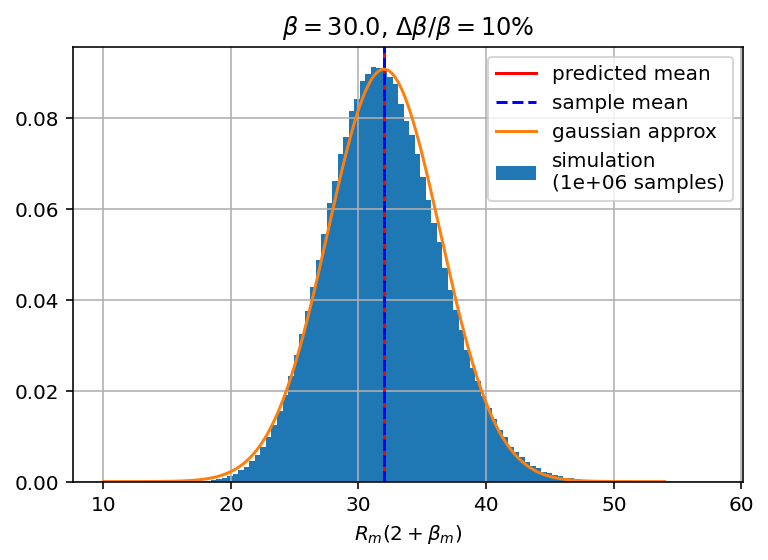

In [11]:
show_approx(R0 = 1, b0 = 30., rel_db = 0.1)

In [12]:

def show_dist(R0 = 2.5, b0 = 0.5, rel_dR = 0.1, rel_db = 0.1, M = 100, dv = 0.01):
    # means
    #R0 = TES resistance (mOhm)
    #b0 = beta

    vm = rng.normal(loc = 1, scale = dv, size = (M,1))
    #vm = 2*rng.random(size = (M,1))

    #vm = rng.choice((-1,1), size = (M,1))*rng.normal(loc = dv, scale = 0.1*dv, size = (M,1))

    #vm /= vm.mean()


    dR = R0*rel_dR
    db = b0*rel_db

    # typical ranges
    #Rm_space = dR*np.linspace(-5, 5, 1000) + R0
    #bm_space = db*np.linspace(-5, 5, 1000) + b0

    def R(N = 100):
        return rng.normal(loc = R0, scale = dR, size = (M,N))

    def b(N = 100):
        return rng.normal(loc = b0, scale = db, size = (M,N))

    N = 1000_000
    Rbs = (vm*R(N)*(2+b(N))).sum(axis = 0)/vm.sum()

    # combined params
    Rb0 = R0*(2 + b0)
    D2 = dR**2*db**2 + dR**2*(2+b0)**2 + db**2*R0**2

    var = (1 + dv**2)*D2/M

    xs = np.sqrt(var)*np.linspace(-5, 5, 1000) + Rb0

    Rb_dist = normal(xs, Rb0, np.sqrt(var))
    Rb_dist2 = normal(xs, Rb0, np.sqrt(D2/M))

    plt.figure()
    plt.title(f'$\\beta = {b0}$, $\\Delta\\beta/\\beta = ${rel_db*100:.0f}%, $\\delta v = ${dv*100:.0f}%')
    plt.grid()
    plt.hist(Rbs, density = True, bins = 100, label = f'simulation\n({N:.0g} samples)')
    plt.axvline(Rb0, color = 'r', label = 'predicted mean')
    plt.axvline(Rbs.mean(), color = 'b', linestyle = '--', label = 'sample mean')
    plt.plot(xs, Rb_dist, label = 'gaussian approx')
    plt.plot(xs, Rb_dist2, label = 'approx w/ zero dv')
    plt.legend()
    plt.xlabel('$\sum_mv_mR_m(2+\\beta_m)/\\sum_mv_m$')

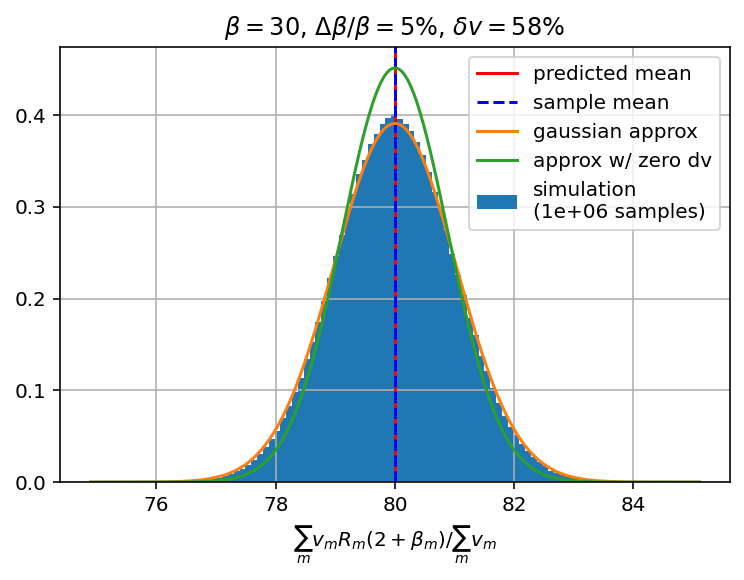

In [13]:
show_dist(b0 = 30, rel_db = 0.05, dv = np.sqrt(1/3))

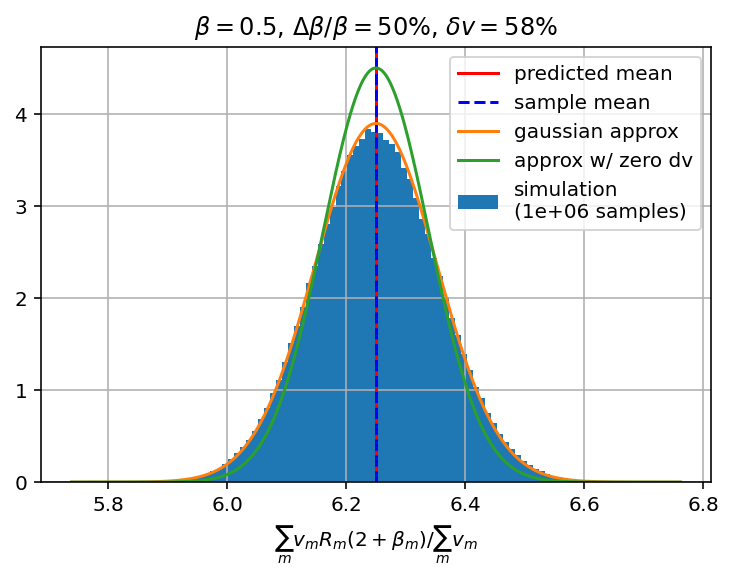

In [14]:
show_dist(b0 = 0.5, rel_db = 0.5, dv = np.sqrt(1/3))# 0.5

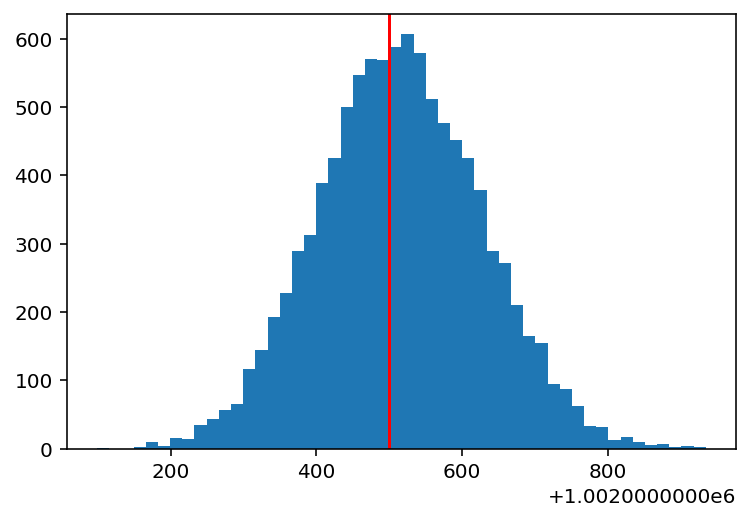

In [133]:
def get_thing(M = 10_000, dv = 0.01):

    #vm = rng.choice((-1,1), size = M)*rng.random(size = M)
    #vm = rng.choice((-1,1), size = M)*(rng.standard_normal(size = M)+1)
    vm = rng.normal(loc = 1, scale = dv, size = M)
    #vm = rng.random(size = M)

    return (1/vm).sum(axis = 0)*vm.sum(axis = 0)


M = 1000
trials = 10_000
dv = 0.05

plt.hist(get_thing((M, trials), dv = dv), bins = 50)
#plt.loglog()
plt.axvline(M**2*(1 + dv**2), color = 'r')

In [127]:
get_thing((M, trials), dv = dv).size # should be 10_000 (= trials)

10000

random matrix

In [129]:


class ElectrothermalSystem:

    def __init__(self, M, N, syst_params):

        self.M = M
        self.N = N
        self.syst_params = syst_params

        self.rng = np.random.default_rng()

        self.set_system_params(**self.syst_params)
        self.generate_everything()



    def set_system_params(self, I0, L, Rl, Rmean, Rdev, Tmean, Tdev, Cmean, Cdev, gmean, gdev, Bmean, Bdev, Amean, Adev):
        self.I0 = I0
        self.L = L
        self.Rl = Rl
        self.Rmean = Rmean
        self.Rdev = Rdev
        self.Tmean = Tmean
        self.Tdev = Tdev
        self.Cmean = Cmean
        self.Cdev = Cdev
        self.gmean = gmean
        self.gdev = gdev
        self.Bmean = Bmean
        self.Bdev = Bdev
        self.Amean = Amean
        self.Adev = Adev

    def generate_everything(self):

        self.base_coefficient_mtx = np.zeros((M+N+1,M+N+1), dtype = np.cdouble)

        # component resistances
        self.R_m = rng.normal(loc = self.Rmean, scale = self.Rmean*self.Rdev, size = self.M) 

        # component heat capacities
        self.C_i = self.rng.normal(loc = self.Cmean, scale = self.Cmean*self.Cdev, size = (self.M+self.N)) 

        # component equilibrium temperatures
        self.T_i = self.rng.normal(loc = self.Tmean, scale = self.Tmean*self.Tdev, size = (self.M+self.N))

        self.g_ij = self.rng.normal(loc = self.gmean, scale = self.gmean*self.gdev, size = (self.M+self.N,self.M+self.N)) # conductance matrix
        #self.g_ij *= self.rng.random((self.g_ij.shape)) > 0.9 # mask most elements

        self.beta_m = self.rng.normal(loc = self.Bmean, scale = self.Bmean*self.Bdev, size = self.M)
        self.alpha_m = self.rng.normal(loc = self.Amean, scale = self.Amean*self.Adev, size = self.M)

        self.G_i = self.g_ij.sum(axis = 1)

        self.Ell_m = (self.I0**2)*self.R_m*self.alpha_m/self.G_i[:M]/self.T_i[:M]

        self.tau_m = self.C_i[:self.M]/self.G_i[:self.M]/(1-self.Ell_m)

        self.Rbeta = self.R_m*(2+self.beta_m)

        
        self.base_coefficient_mtx[0,1:M+1] = self.G_i[:M]*self.Ell_m/self.I0/self.L
        self.base_coefficient_mtx[1:M+1,0] = -self.I0*self.Rbeta/self.C_i[:M]
        self.base_coefficient_mtx[1:,1:] = -self.g_ij/self.C_i[:,np.newaxis]

        diagonal = np.zeros(1+M+N, dtype = np.cdouble)
        diagonal[0] = (self.Rl * self.Rbeta.sum())/self.L
        diagonal[1:M+1] = self.G_i[:M]*(1-self.Ell_m)/self.C_i[:M]
        diagonal[-N:] = self.G_i[-N:]/self.C_i[-N:]
        np.fill_diagonal(self.base_coefficient_mtx, diagonal)


    def get_M(self, w):
        return 1j*w*np.identity((M+N+1), dtype = np.cdouble) + self.base_coefficient_mtx

    def get_logDm(self, w):

        MM = self.get_M(w)
        Dm = []

        for m in range(M):
            sub_M = np.zeros((M+N,M+N), dtype = np.cdouble)
            sub_M[:m,:m] = MM[:m,:m]
            sub_M[:m,m:] = MM[:m,m+1:]
            sub_M[m:,:m] = MM[m+1:,:m]
            sub_M[m:,m:] = MM[m+1:,m+1:]
            Dm.append(np.linalg.slogdet(sub_M))

        return Dm

    def get_R_avg(self, w, regen = False):

        if regen:
            self.generate_everything()

        k, z = np.array(self.get_logDm(w)).T

        total = 0

        for m in range(M):
            for n in range(M):
                total += (-1)**(n+m)*(self.C_i[n]/self.C_i[m])*(z[m]/z[n])*np.exp(k[m]-k[n])*(self.R_m[m]*(2+self.beta_m[m]))

        return total


# end ElectrothermalSystem class

syst_params = {
    'I0': 80e-6, # equilibrium bias current (A)
    'L': 250e-9, # inductance (H)
    'Rmean': 160e-3/M, # mean component resistance R_{m,0} (Ohm)
    'Rdev': 0.01, # relative deviation in R_{m,0}
    'Cmean': 1e-5, # mean component heat capacity C_m (J/K)
    'Cdev': 0.01, # relative deviation in C_m
    'gmean': 1e-9, # mean thermal conductance g_{ij} (J/K)
    'gdev': 0.01, # relative deviation in g_{ij}
    'Bmean': 1, # mean beta_m (current responsivity)
    'Bdev': 0.01, # relative deviation in beta_m
    'Amean': 200, # mean alpha_m (thermal responsivity)
    'Adev': 0.01, # relative deviation in alpha_m
    'Tmean': 0.05, # mean operating temperature (K)
    'Tdev': 0.01, # relative deviation in Tmean
    'Rl': 5e-3, # parasitic resistance
}


M = 300 # number of TES component heat capacities
N = 900 # number of external heat capacities


etm = ElectrothermalSystem(M, N, syst_params)

print(abs(etm.get_R_avg(1e3))/(etm.Rmean*(2+etm.Bmean)))

1.0941888350042954


In [130]:
ws = np.geomspace(0.01, 1e6, 50)

ratios = np.array([abs(etm.get_R_avg(w))/(etm.Rmean*(2+etm.Bmean)) for w in ws])

Text(0, 0.5, 'R_avg/Rmean')

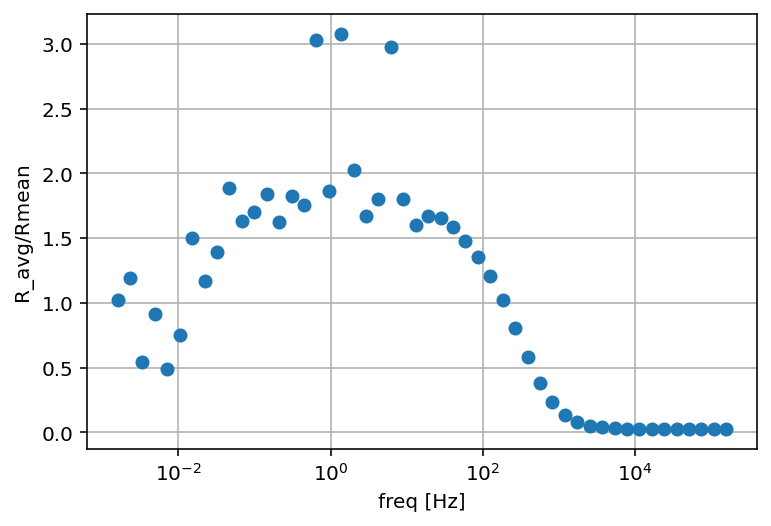

In [135]:
plt.figure()
plt.semilogx()
plt.plot(ws/2/np.pi, ratios, 'o')
plt.grid()
plt.xlabel('freq [Hz]')
plt.ylabel('R_avg/Rmean')